In [1]:
# Étape 0 – Imports et chargement

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    f1_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Chargement du dataset
df = pd.read_csv("german-credit.csv", sep=";")

df.head()


,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [2]:
# Aperçu global
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [3]:
# Statistiques descriptives des variables numériques
df.describe()


,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [4]:
# Répartition de la variable cible : Creditability
df["Creditability"].value_counts(normalize=True)


Creditability
1    0.7
0    0.3
Name: proportion, dtype: float64

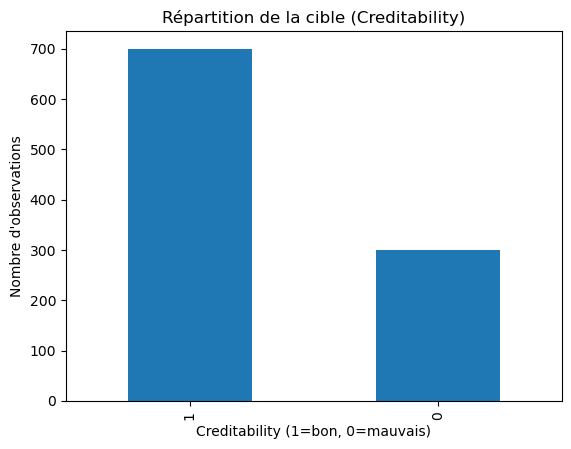

In [5]:
# Visualisation de la répartition good vs bad credit
df["Creditability"].value_counts().plot(kind="bar")
plt.title("Répartition de la cible (Creditability)")
plt.xlabel("Creditability (1=bon, 0=mauvais)")
plt.ylabel("Nombre d'observations")
plt.show()


In [6]:
# Nombre de modalités par colonne
for col in df.columns:
    print(col, "->", df[col].nunique())


Creditability -> 2
Account_Balance -> 4
Duration_of_Credit_monthly -> 33
Payment_Status_of_Previous_Credit -> 5
Purpose -> 10
Credit_Amount -> 923
Value_Savings_Stocks -> 5
Length_of_current_employment -> 5
Instalment_per_cent -> 4
Sex_Marital_Status -> 4
Guarantors -> 3
Duration_in_Current_address -> 4
Most_valuable_available_asset -> 4
Age_years -> 53
Concurrent_Credits -> 3
Type_of_apartment -> 3
No_of_Credits_at_this_Bank -> 4
Occupation -> 4
No_of_dependents -> 2
Telephone -> 2
Foreign_Worker -> 2


In [7]:
# Séparation X / y
X = df.drop("Creditability", axis=1)
y = df["Creditability"]

# Train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
# Choix simple : quelques colonnes comme numériques, le reste catégorielles
num_cols = ["Duration_of_Credit_monthly", "Credit_Amount", "Age_years", "Instalment_per_cent"]
cat_cols = [c for c in X.columns if c not in num_cols]

num_cols, cat_cols


(['Duration_of_Credit_monthly',
  'Credit_Amount',
  'Age_years',
  'Instalment_per_cent'],
 ['Account_Balance',
  'Payment_Status_of_Previous_Credit',
  'Purpose',
  'Value_Savings_Stocks',
  'Length_of_current_employment',
  'Sex_Marital_Status',
  'Guarantors',
  'Duration_in_Current_address',
  'Most_valuable_available_asset',
  'Concurrent_Credits',
  'Type_of_apartment',
  'No_of_Credits_at_this_Bank',
  'Occupation',
  'No_of_dependents',
  'Telephone',
  'Foreign_Worker'])

In [9]:
# Préprocesseur : Standardisation + One-Hot Encoding
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


In [10]:
# Régression logistique
log_reg = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

log_reg.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
#Random Forest
rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

rf.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
#Gradient Boosting
gb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])

gb.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
#SMOTE + Régression logistique
smote_model = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

smote_model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


=== Logistic Regression ===
F1 (classe 1=bon) : 0.7984496124031008
Recall bad credit (classe 0) : 0.75
AUC ROC : 0.8290476190476189
Confusion matrix :
[[ 45  15]
 [ 37 103]]


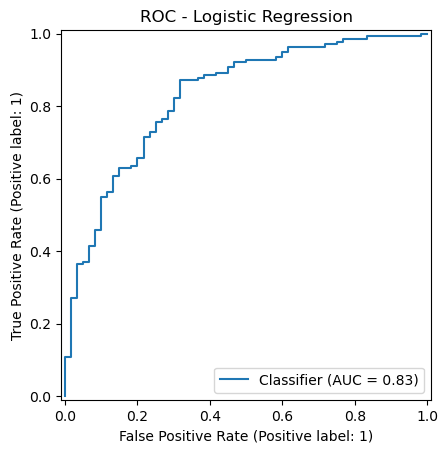

=== Random Forest ===
F1 (classe 1=bon) : 0.8506493506493507
Recall bad credit (classe 0) : 0.38333333333333336
AUC ROC : 0.8263095238095237
Confusion matrix :
[[ 23  37]
 [  9 131]]


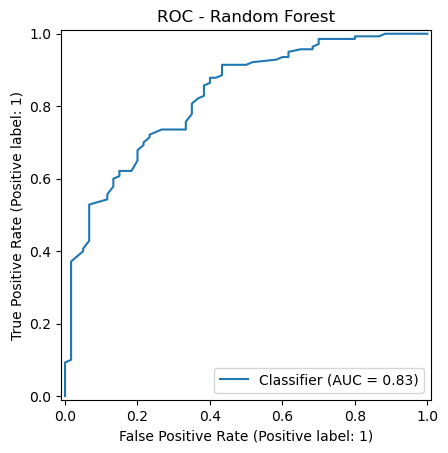

=== Gradient Boosting ===
F1 (classe 1=bon) : 0.8484848484848485
Recall bad credit (classe 0) : 0.48333333333333334
AUC ROC : 0.8129761904761904
Confusion matrix :
[[ 29  31]
 [ 14 126]]


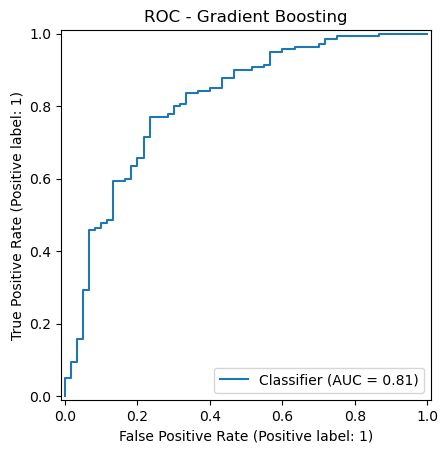

=== SMOTE + Logistic Regression ===
F1 (classe 1=bon) : 0.7984496124031008
Recall bad credit (classe 0) : 0.75
AUC ROC : 0.8125
Confusion matrix :
[[ 45  15]
 [ 37 103]]


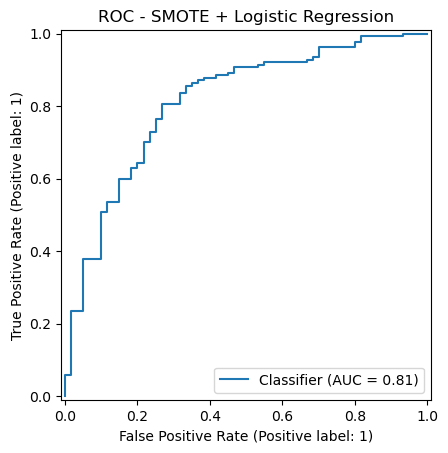

In [14]:
def eval_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} ===")
    print("F1 (classe 1=bon) :", f1_score(y_test, y_pred, pos_label=1))
    print("Recall bad credit (classe 0) :", recall_score(y_test, y_pred, pos_label=0))
    print("AUC ROC :", roc_auc_score(y_test, y_proba))
    print("Confusion matrix :")
    print(confusion_matrix(y_test, y_pred))

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC - {name}")
    plt.show()
    
eval_model("Logistic Regression", log_reg, X_test, y_test)
eval_model("Random Forest", rf, X_test, y_test)
eval_model("Gradient Boosting", gb, X_test, y_test)
eval_model("SMOTE + Logistic Regression", smote_model, X_test, y_test)


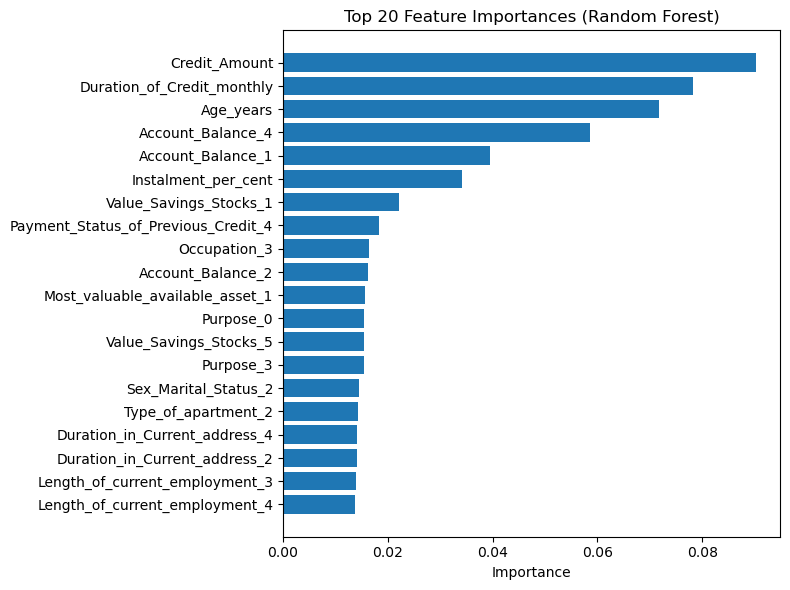

Credit_Amount : 0.09034038956276519
Duration_of_Credit_monthly : 0.07832939180446086
Age_years : 0.07172470533688893
Account_Balance_4 : 0.058547845700811306
Account_Balance_1 : 0.0395171835945824
Instalment_per_cent : 0.03416900238106005
Value_Savings_Stocks_1 : 0.022063273578492713
Payment_Status_of_Previous_Credit_4 : 0.018376069123912635
Occupation_3 : 0.01648947799219104
Account_Balance_2 : 0.01618679127592019
Most_valuable_available_asset_1 : 0.015652513731743804
Purpose_0 : 0.015495969104339417
Value_Savings_Stocks_5 : 0.015420601418466469
Purpose_3 : 0.0153690217585264
Sex_Marital_Status_2 : 0.014558682928545643
Type_of_apartment_2 : 0.01434158963750123
Duration_in_Current_address_4 : 0.01416457694074416
Duration_in_Current_address_2 : 0.01407046924237646
Length_of_current_employment_3 : 0.01400780991498987
Length_of_current_employment_4 : 0.013794697147169159


In [15]:
# Importance des features pour le Random Forest

# Récupération des noms de features après encodage
ohe = rf.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_feature_names])

importances = rf.named_steps["model"].feature_importances_
indices = np.argsort(importances)[::-1]

# Top 20 features
top_n = 20
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), importances[indices[:top_n]][::-1])
plt.yticks(range(top_n), feature_names[indices[:top_n]][::-1])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

for idx in indices[:top_n]:
    print(feature_names[idx], ":", importances[idx])


In [16]:
# Choix du modèle final pour l'interface
best_model = rf  # ou log_reg, gb, smote_model


In [17]:
def predict_client(
    Account_Balance,
    Duration_of_Credit_monthly,
    Payment_Status_of_Previous_Credit,
    Purpose,
    Credit_Amount,
    Value_Savings_Stocks,
    Length_of_current_employment,
    Instalment_per_cent,
    Sex_Marital_Status,
    Guarantors,
    Duration_in_Current_address,
    Most_valuable_available_asset,
    Age_years,
    Concurrent_Credits,
    Type_of_apartment,
    No_of_Credits_at_this_Bank,
    Occupation,
    No_of_dependents,
    Telephone,
    Foreign_Worker
):
    data = {
        "Account_Balance": [Account_Balance],
        "Duration_of_Credit_monthly": [Duration_of_Credit_monthly],
        "Payment_Status_of_Previous_Credit": [Payment_Status_of_Previous_Credit],
        "Purpose": [Purpose],
        "Credit_Amount": [Credit_Amount],
        "Value_Savings_Stocks": [Value_Savings_Stocks],
        "Length_of_current_employment": [Length_of_current_employment],
        "Instalment_per_cent": [Instalment_per_cent],
        "Sex_Marital_Status": [Sex_Marital_Status],
        "Guarantors": [Guarantors],
        "Duration_in_Current_address": [Duration_in_Current_address],
        "Most_valuable_available_asset": [Most_valuable_available_asset],
        "Age_years": [Age_years],
        "Concurrent_Credits": [Concurrent_Credits],
        "Type_of_apartment": [Type_of_apartment],
        "No_of_Credits_at_this_Bank": [No_of_Credits_at_this_Bank],
        "Occupation": [Occupation],
        "No_of_dependents": [No_of_dependents],
        "Telephone": [Telephone],
        "Foreign_Worker": [Foreign_Worker],
    }
    X_new = pd.DataFrame(data)
    proba_good = best_model.predict_proba(X_new)[0, 1]
    label = "Éligible (bon crédit)" if proba_good >= 0.5 else "Risque de non-remboursement"
    return f"{label} — probabilité de bon crédit : {proba_good:.2f}"


In [18]:
!pip install gradio


  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached ffmpy-1.0.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.50.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached annotated_doc-0.0.4-py3-none-any.whl.metadata (6.6 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.2 MB ? eta -:--:--
    --------------------------------------- 0.5/24.2 MB 1.8 MB/s eta 0:00:13
   - -------------------------------------- 1.0/24.2 MB 2.0 MB/s eta 0:00:12
   -- ------------------------------------- 1.6/24.2 MB 2.1 MB/s eta 0:00:11
   --- --------------

In [19]:
import gradio as gr
inputs = [
    gr.Slider(1, 4, step=1, label="Account_Balance"),
    gr.Slider(4, 72, step=1, label="Duration_of_Credit_monthly"),
    gr.Slider(0, 4, step=1, label="Payment_Status_of_Previous_Credit"),
    gr.Slider(0, 10, step=1, label="Purpose"),
    gr.Slider(250, 20000, step=50, label="Credit_Amount"),
    gr.Slider(1, 5, step=1, label="Value_Savings_Stocks"),
    gr.Slider(1, 5, step=1, label="Length_of_current_employment"),
    gr.Slider(1, 4, step=1, label="Instalment_per_cent"),
    gr.Slider(1, 4, step=1, label="Sex_Marital_Status"),
    gr.Slider(1, 3, step=1, label="Guarantors"),
    gr.Slider(1, 4, step=1, label="Duration_in_Current_address"),
    gr.Slider(1, 4, step=1, label="Most_valuable_available_asset"),
    gr.Slider(18, 75, step=1, label="Age_years"),
    gr.Slider(1, 3, step=1, label="Concurrent_Credits"),
    gr.Slider(1, 4, step=1, label="Type_of_apartment"),
    gr.Slider(1, 4, step=1, label="No_of_Credits_at_this_Bank"),
    gr.Slider(1, 4, step=1, label="Occupation"),
    gr.Slider(1, 2, step=1, label="No_of_dependents"),
    gr.Slider(1, 2, step=1, label="Telephone"),
    gr.Slider(1, 2, step=1, label="Foreign_Worker"),
]

demo = gr.Interface(
    fn=predict_client,
    inputs=inputs,
    outputs=gr.Textbox(label="Décision crédit"),
    title="Éligibilité crédit"
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


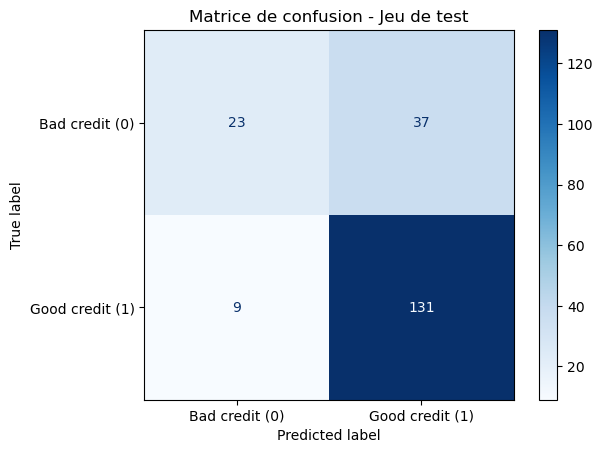

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = rf  # par exemple

y_pred = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Bad credit (0)", "Good credit (1)"],
    cmap="Blues"
)
plt.title("Matrice de confusion - Jeu de test")
plt.show()


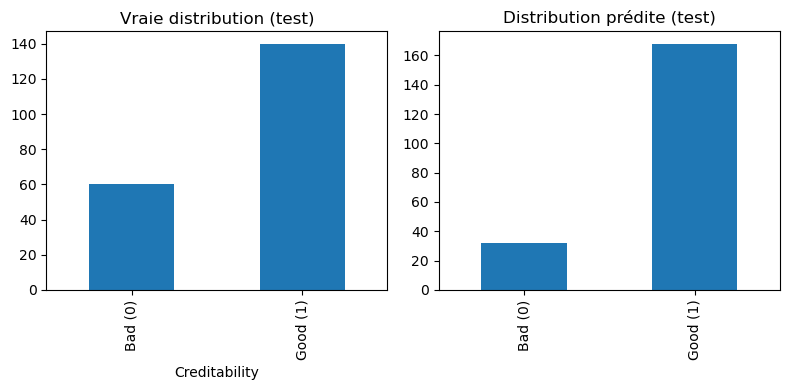

In [21]:
# Vraies valeurs
true_counts = y_test.value_counts().sort_index()

# Prédictions
pred_counts = pd.Series(y_pred).value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

true_counts.plot(kind="bar", ax=ax[0], title="Vraie distribution (test)")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Bad (0)", "Good (1)"])

pred_counts.plot(kind="bar", ax=ax[1], title="Distribution prédite (test)")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Bad (0)", "Good (1)"])

plt.tight_layout()
plt.show()


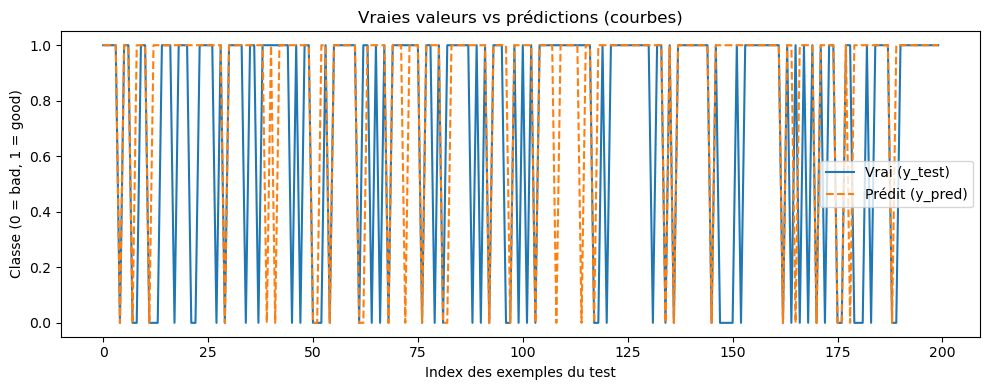

In [22]:
best_model = rf  # ou ton modèle final

y_pred = best_model.predict(X_test)

# On remet y_test dans le même ordre et on réinitialise l'index
y_true = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred, name="y_pred")

plt.figure(figsize=(10, 4))
plt.plot(y_true.values, label="Vrai (y_test)", linestyle="-")
plt.plot(y_pred_series.values, label="Prédit (y_pred)", linestyle="--")
plt.xlabel("Index des exemples du test")
plt.ylabel("Classe (0 = bad, 1 = good)")
plt.title("Vraies valeurs vs prédictions (courbes)")
plt.legend()
plt.tight_layout()
plt.show()


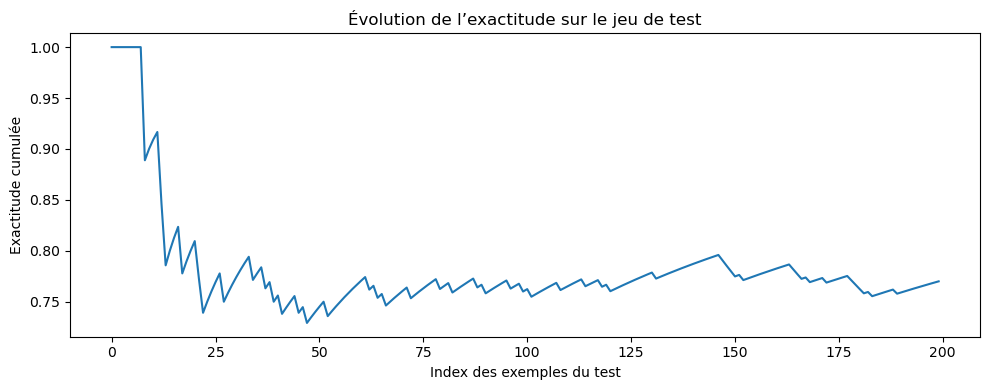

In [23]:
correct = (y_true.values == y_pred_series.values).astype(int)
accuracy_cumulee = correct.cumsum() / np.arange(1, len(correct) + 1)

plt.figure(figsize=(10, 4))
plt.plot(accuracy_cumulee)
plt.xlabel("Index des exemples du test")
plt.ylabel("Exactitude cumulée")
plt.title("Évolution de l’exactitude sur le jeu de test")
plt.tight_layout()
plt.show()


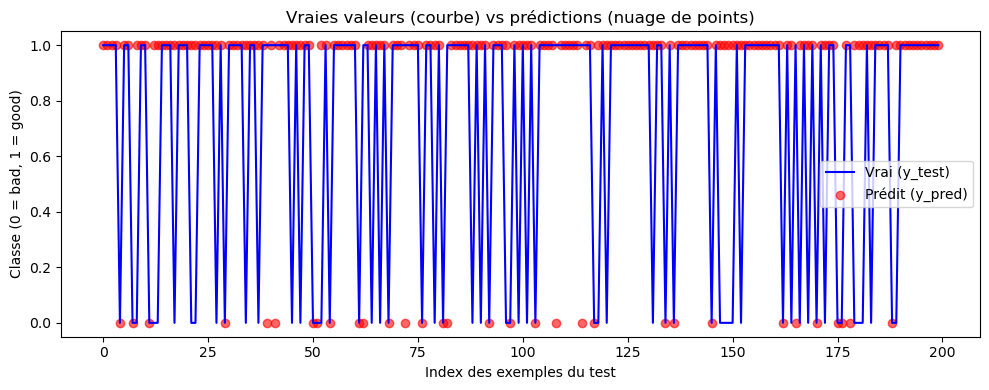

In [24]:
best_model = rf  # ou ton modèle final

# Prédictions
y_pred = best_model.predict(X_test)

# Remettre les index au propre
y_true = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred, name="y_pred")

x = np.arange(len(y_true))  # axe des indices

plt.figure(figsize=(10, 4))

# 1) Courbe pour les vraies valeurs
plt.plot(x, y_true.values, label="Vrai (y_test)", linestyle="-", color="blue")

# 2) Nuage de points pour les prédictions
plt.scatter(x, y_pred_series.values, label="Prédit (y_pred)", color="red", alpha=0.6)

plt.xlabel("Index des exemples du test")
plt.ylabel("Classe (0 = bad, 1 = good)")
plt.title("Vraies valeurs (courbe) vs prédictions (nuage de points)")
plt.legend()
plt.tight_layout()
plt.show()
